<a href="https://colab.research.google.com/github/PrachiSinghal86/Introduction-to-Pytorch/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as ply
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
trainset=datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

  0%|          | 16384/26421880 [00:00<02:49, 155530.23it/s]

26427392it [00:00, 74280871.29it/s]                            


Extracting Fashion-MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw


32768it [00:00, 434379.43it/s]
  2%|▏         | 98304/4422102 [00:00<00:04, 948264.68it/s]

Extracting Fashion-MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw


4423680it [00:00, 20511099.67it/s]                            
8192it [00:00, 164744.34it/s]


Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw
Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw
Processing...
Done!


In [21]:
from torch import nn
import torch.nn.functional as F

images, labels = next(iter(trainloader))  
images = images.view(images.shape[0], -1)
print(images.shape)
model =nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),nn.Linear(256,128),
                     nn.ReLU(),nn.Linear(128,64),
                     
                     nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))
crite=nn.NLLLoss()    #Loss Function
logits=model(images)
loss=crite(logits,labels)
print(loss)


torch.Size([64, 784])
tensor(2.3037, grad_fn=<NllLossBackward>)


In [26]:
from torch import optim

epoch=6
optimizer=optim.SGD(model.parameters(),lr=0.01)
for i in range(epoch):
  runlos=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)   #flatten the images
    optimizer.zero_grad()
    output=model.forward(images)
    loss=crite(output,labels)
    loss.backward()
    optimizer.step()
    runlos+=loss.item()
  else:
    print(f"Training Loss:{runlos/len(trainloader)}")



Training Loss:0.33708216099024835
Training Loss:0.32756585180600567
Training Loss:0.32046569080781073
Training Loss:0.31300996051731905
Training Loss:0.3063398075383355
Training Loss:0.299083151066227


In [0]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

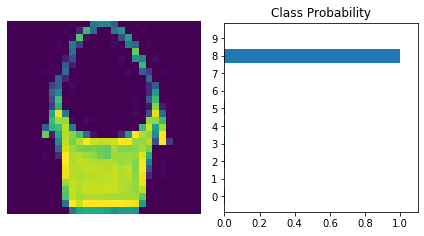

In [31]:
%matplotlib inline

import helper
images,labels=next(iter(trainloader))
img=images[10].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
p=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),p)